### **Cricket Player Prediction**

HARSHITH N GOWDA

gowdaharshith683@gmail.com


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
bats_data = pd.read_csv("/content/Batsman_Data.csv")
bowler_data = pd.read_csv("/content/Bowler_data.csv")
ground_av = pd.read_csv("/content/Ground_Averages.csv")
odi_results = pd.read_csv("/content/ODI_Match_Results.csv")
odi_totals = pd.read_csv("/content/ODI_Match_Totals.csv")
wc_players = pd.read_csv("/content/WC_players.csv")

In [3]:
df_list = [bats_data, bowler_data, ground_av, odi_results, odi_totals, wc_players]

### **Cleaning data**

In [4]:
for i in df_list:
    print(i.shape)
    print('*' * 100)
    print(i.info())
    print('*' * 100)
    print(i.isna().sum())

(11149, 13)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB
None
****************************************************************************************************
Unnamed: 0    0
Bat1 

In [5]:
for i in df_list:
    i.drop_duplicates(inplace=True)
    print(i.shape)
    print('*' * 100)

(11149, 13)
****************************************************************************************************
(11118, 14)
****************************************************************************************************
(106, 11)
****************************************************************************************************
(1322, 12)
****************************************************************************************************
(1296, 13)
****************************************************************************************************
(152, 3)
****************************************************************************************************


In [6]:
for i in range(len(df_list)):
    if 'Start Date' in df_list[i].columns:
        df_list[i]['Year'] = pd.to_datetime(df_list[i]['Start Date'])
        df_list[i]['Month'] = df_list[i]['Year'].dt.month  # Extracting Month
        df_list[i]['Day'] = df_list[i]['Year'].dt.day  # Extracting day
        df_list[i]['year'] = df_list[i]['Year'].dt.year  # Extracting year
        df_list[i].drop('Start Date', axis=1, inplace=True)  # Drop the original 'Start Date' column
        print(df_list[i].head())
        print("-------------------------")
    else:
        print("DataFrame", i, "does not have 'Start Date' column")
        print("-------------------------")

   Unnamed: 0 Bat1 Runs BF SR 4s 6s    Opposition   Ground    Match_ID  \
0           1  DNB    -  -  -  -  -       v India   Nagpur  ODI # 2933   
1           2  DNB    -  -  -  -  -       v India  Kolkata  ODI # 2935   
2           3  DNB    -  -  -  -  -       v India    Delhi  ODI # 2936   
3           4  DNB    -  -  -  -  -  v Bangladesh    Dhaka  ODI # 2937   
4           5  DNB    -  -  -  -  -       v India    Dhaka  ODI # 2938   

         Batsman  Player_ID       Year  Month  Day  year  
0  Oshane Thomas      49619 2009-12-18     12   18  2009  
1  Oshane Thomas      49619 2009-12-24     12   24  2009  
2  Oshane Thomas      49619 2009-12-27     12   27  2009  
3  Oshane Thomas      49619 2010-01-04      1    4  2010  
4  Oshane Thomas      49619 2010-01-05      1    5  2010  
-------------------------
   Unnamed: 0 Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground  \
0           1   8.0    0   57    0  7.12      -     -       v India   Nagpur   
1           2  

In [7]:
for i in range(len(df_list)):
    drop_cols = ["Unnamed: 0"]
    unneces_cols = [col for col in drop_cols if col in df_list[i].columns]

    if unneces_cols:
        df_list[i].drop(columns = unneces_cols, axis = 1, inplace = True)
        print("DataFrame", i, "after dropping irrelevant columns:")
        print(df_list[i].head())  # Printing the DataFrame after dropping columns
        print("-------------------------")
    else:
        print("DataFrame", i, "does not have any irrelevant columns")
        print("-------------------------")

DataFrame 0 after dropping irrelevant columns:
  Bat1 Runs BF SR 4s 6s    Opposition   Ground    Match_ID        Batsman  \
0  DNB    -  -  -  -  -       v India   Nagpur  ODI # 2933  Oshane Thomas   
1  DNB    -  -  -  -  -       v India  Kolkata  ODI # 2935  Oshane Thomas   
2  DNB    -  -  -  -  -       v India    Delhi  ODI # 2936  Oshane Thomas   
3  DNB    -  -  -  -  -  v Bangladesh    Dhaka  ODI # 2937  Oshane Thomas   
4  DNB    -  -  -  -  -       v India    Dhaka  ODI # 2938  Oshane Thomas   

   Player_ID       Year  Month  Day  year  
0      49619 2009-12-18     12   18  2009  
1      49619 2009-12-24     12   24  2009  
2      49619 2009-12-27     12   27  2009  
3      49619 2010-01-04      1    4  2010  
4      49619 2010-01-05      1    5  2010  
-------------------------
DataFrame 1 after dropping irrelevant columns:
  Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground    Match_ID  \
0   8.0    0   57    0  7.12      -     -       v India   Nagpur  ODI # 2

In [8]:
from sklearn.preprocessing import LabelEncoder

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Get categorical columns for each DataFrame
cat_col_list = []
for df in df_list:
    cat_col = [col for col in df.columns if df[col].dtype not in numerics]
    cat_col_list.append(cat_col)

# Label encode categorical columns for each DataFrame
label = LabelEncoder()
for i, cat_col in enumerate(cat_col_list):
    for col in cat_col:
        encoded_values = label.fit_transform(df_list[i][col])
        df_list[i][col] = encoded_values

In [9]:
bats_data.head(5)

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Year,Month,Day,year
0,319,0,0,0,0,0,9,92,759,113,49619,691,12,18,2009
1,319,0,0,0,0,0,9,78,761,113,49619,693,12,24,2009
2,319,0,0,0,0,0,9,37,762,113,49619,694,12,27,2009
3,319,0,0,0,0,0,4,38,763,113,49619,695,1,4,2010
4,319,0,0,0,0,0,9,38,764,113,49619,696,1,5,2010


In [10]:
from sklearn.impute import SimpleImputer

df_list2 = [odi_results, odi_totals]

imputer = SimpleImputer(strategy = "mean")
df_list2_imputed = [pd.DataFrame(imputer.fit_transform(df), columns = df.columns) for df in df_list2]

_ = [print(f"DataFrame {i} after imputation:\n{df.isnull().sum()}\n{'-'*25}") for i, df in enumerate(df_list2_imputed)]

DataFrame 0 after imputation:
Result        0
Margin        0
BR            0
Toss          0
Bat           0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Year          0
Month         0
Day           0
year          0
dtype: int64
-------------------------
DataFrame 1 after imputation:
Score         0
Overs         0
RPO           0
Target        0
Inns          0
Result        0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Year          0
Month         0
Day           0
year          0
dtype: int64
-------------------------


In [11]:
odi_results = df_list2_imputed[0]
odi_totals = df_list2_imputed[1]

### **EDA**

In [12]:
df_list3 = [bats_data, bowler_data, ground_av, df_list2_imputed[0], df_list2_imputed[1], wc_players]

In [13]:
for j in df_list3:
    print(j.isnull().sum())

Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Match_ID      0
Batsman       0
Player_ID     0
Year          0
Month         0
Day           0
year          0
dtype: int64
Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Ave           0
SR            0
Opposition    0
Ground        0
Match_ID      0
Bowler        0
Player_ID     0
Year          0
Month         0
Day           0
year          0
dtype: int64
Ground    0
Span      0
Mat       0
Won       0
Tied      0
NR        0
Runs      0
Wkts      0
Balls     0
Ave       0
RPO       0
dtype: int64
Result        0
Margin        0
BR            0
Toss          0
Bat           0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Year          0
Month         0
Day           0
year          0
dtype: int64
Score         0
Overs         0
RPO           0
Target        0
Inns          0
Result        0


In [14]:
concatenated_df = pd.concat(df_list3, ignore_index = True)

In [15]:
country = concatenated_df["Country"].unique()
country

array([nan,  6.,  4.,  8.,  1.,  3.,  7.,  5.,  9.,  0.,  2.])

<Axes: xlabel='Country', ylabel='count'>

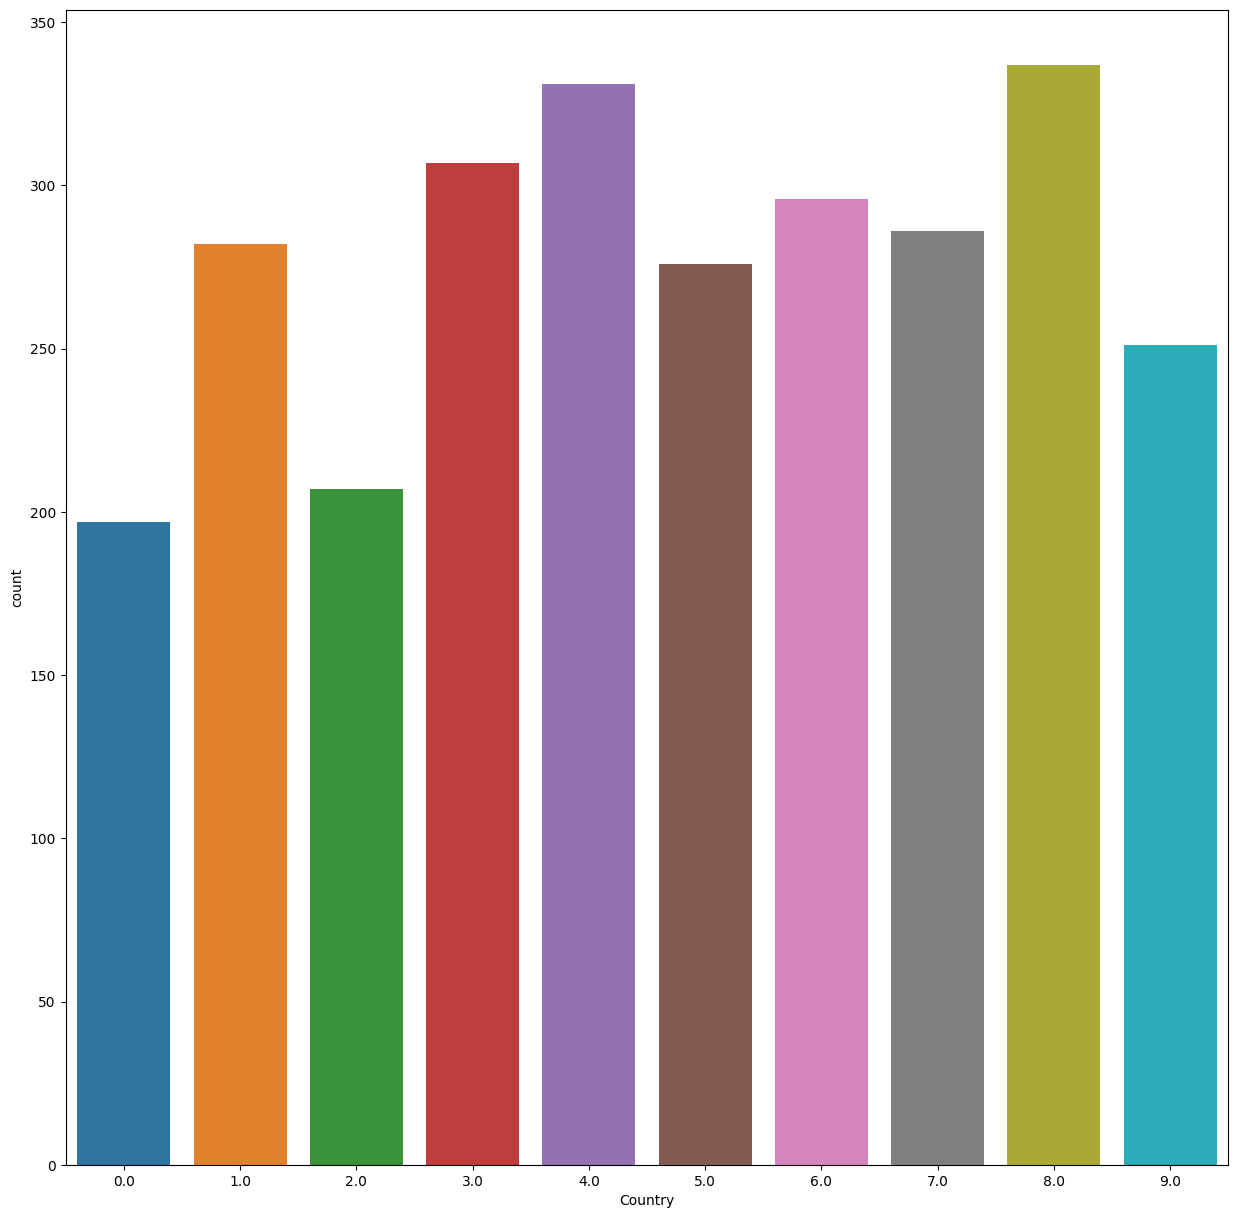

In [16]:
plt.figure(figsize=(15, 15))
sns.countplot(x='Country', data=concatenated_df)

### SriLanka played the most games and New Zealand played the least

<Axes: xlabel='Result', ylabel='count'>

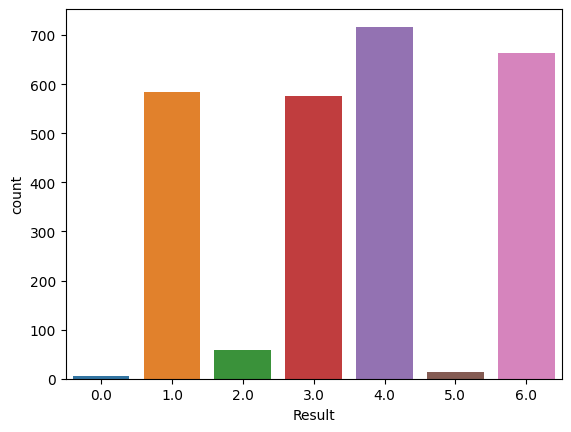

In [17]:
#checking the number of matches won and lost
sns.countplot(x = "Result", data = concatenated_df)

In [18]:
# Using merge function to join bats_data and bowler_data
bats_and_bowler = pd.merge(
    left = bats_data,
    right = bowler_data,
    on = ["Match_ID", "Player_ID", "Opposition", "Ground", "Month", "Day", "year"],
    how = "inner"
)
bats_and_bowler.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,year,Overs,Mdns,Runs_y,Wkts,Econ,Ave,SR_y,Bowler,Year_y
0,319,0,0,0,0,0,9,92,759,113,...,2009,49,1,59,1,412,0,0,138,691
1,319,0,0,0,0,0,9,78,761,113,...,2009,12,1,57,3,316,103,77,138,693
2,319,0,0,0,0,0,9,37,762,113,...,2009,0,0,0,0,0,0,0,138,694
3,319,0,0,0,0,0,4,38,763,113,...,2010,55,2,66,3,406,120,70,138,695
4,319,0,0,0,0,0,9,38,764,113,...,2010,49,2,49,1,349,0,0,138,696


In [19]:
#merging bats_and_bowler with ground_av
bats_bowler_groundAv = pd.merge(
    left = bats_and_bowler,
    right = ground_av,
    on = ["Ground"],
    how = "inner"
)
bats_bowler_groundAv.head()


,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Span,Mat,Won,Tied,NR,Runs,Wkts_y,Balls,Ave_y,RPO
0,319,0,0,0,0,0,9,92,759,113,...,6,16,14,0,2,6890,202,7508,34.1,5.5
1,12,7,21,1757,24,10,9,92,84,20,...,6,16,14,0,2,6890,202,7508,34.1,5.5
2,217,128,104,240,3,1,9,92,391,20,...,6,16,14,0,2,6890,202,7508,34.1,5.5
3,184,111,81,572,20,1,9,92,759,11,...,6,16,14,0,2,6890,202,7508,34.1,5.5
4,319,0,0,0,0,0,9,92,927,25,...,6,16,14,0,2,6890,202,7508,34.1,5.5


In [20]:
#joining odi_results and odi_totals
odi_results_totals = pd.merge(
    left = odi_results,
    right = odi_totals,
    on = ["Ground", "Country","Country_ID","Month","Day","year","Opposition"],
    how = "inner"
)
odi_results_totals.head()

,Result_x,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID_x,Country,Country_ID,...,Day,year,Score,Overs,RPO,Target,Inns,Result_y,Match_ID_y,Year_y
0,6.0,160.0,51.409241,1.0,1.0,5.0,57.0,0.0,6.0,7.0,...,3.0,2013.0,404.0,48.3,165.0,253.440323,1.0,4.0,0.0,0.0
1,3.0,160.0,51.409241,2.0,2.0,11.0,57.0,0.0,4.0,6.0,...,3.0,2013.0,115.0,48.0,25.0,251.000000,2.0,1.0,0.0,0.0
2,3.0,3.0,51.409241,1.0,2.0,5.0,29.0,1.0,6.0,7.0,...,6.0,2013.0,93.0,48.5,18.0,168.000000,2.0,1.0,1.0,1.0
3,6.0,3.0,51.409241,2.0,1.0,11.0,29.0,1.0,4.0,6.0,...,6.0,2013.0,120.0,43.4,48.0,253.440323,1.0,4.0,1.0,1.0
4,3.0,10.0,51.409241,1.0,2.0,1.0,63.0,2.0,8.0,8.0,...,11.0,2013.0,199.0,40.0,146.0,306.000000,2.0,1.0,2.0,2.0


In [21]:
#joining bats_bowler_groundAv and odi_results_totals
bats_bowler_groundAv_odi = pd.merge(
        left = bats_bowler_groundAv,
        right = odi_results_totals,
        on = ["Ground", "Month", "Day", "year"],
        how = "inner"
)
bats_bowler_groundAv_odi.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Country_ID,Year_x_y,Score,Overs_y,RPO_y,Target,Inns,Result_y,Match_ID_y,Year_y_y
0,140,86,14,677,1,1,15,1,1225,113,...,8.0,115.0,294.0,48.5,111.0,253.440323,1.0,1.0,123.0,112.0
1,140,86,14,677,1,1,15,1,1225,113,...,7.0,115.0,298.0,41.1,196.0,226.000000,2.0,4.0,123.0,112.0
2,0,1,108,1,1,1,15,1,1225,80,...,8.0,115.0,294.0,48.5,111.0,253.440323,1.0,1.0,123.0,112.0
3,0,1,108,1,1,1,15,1,1225,80,...,7.0,115.0,298.0,41.1,196.0,226.000000,2.0,4.0,123.0,112.0
4,277,158,141,4,2,1,15,1,1225,78,...,8.0,115.0,294.0,48.5,111.0,253.440323,1.0,1.0,123.0,112.0


In [22]:
#joining bats_bowler_groundAv with wc_players
#checking out their column names to ensure consistency
bats_bowler_groundAv_odi.columns, wc_players.columns

(Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
        'Match_ID', 'Batsman', 'Player_ID', 'Year_x_x', 'Month', 'Day', 'year',
        'Overs_x', 'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y',
        'Bowler', 'Year_y_x', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs',
        'Wkts_y', 'Balls', 'Ave_y', 'RPO_x', 'Result_x', 'Margin', 'BR', 'Toss',
        'Bat', 'Opposition_y', 'Match_ID_x', 'Country', 'Country_ID',
        'Year_x_y', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_y',
        'Match_ID_y', 'Year_y_y'],
       dtype='object'),
 Index(['Player', 'ID', 'Country'], dtype='object'))

## The ID columns for both are named differently, so we'll rename ID on wc_players to Player_ID to sync with Player_ID of bats_bowler_groundAv_odi

In [23]:
wc_players = wc_players.rename(columns={"ID":"Player_ID"})
wc_players.head()

,Player,Player_ID,Country
0,42,352048,0
1,118,793463,0
2,5,440963,0
3,13,320652,0
4,30,516561,0


In [24]:
#join them finally
final_join = pd.merge(
        left = bats_bowler_groundAv_odi,
        right = wc_players,
        on = ["Player_ID", "Country"],
        how = "inner"
)
final_join.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Year_x_y,Score,Overs_y,RPO_y,Target,Inns,Result_y,Match_ID_y,Year_y_y,Player
0,0,1,108,1,1,1,15,1,1225,80,...,115.0,294.0,48.5,111.0,253.440323,1.0,1.0,123.0,112.0,80
1,0,1,2,1,1,1,15,1,1227,80,...,117.0,335.0,49.4,124.0,233.000000,2.0,4.0,125.0,114.0,80
2,2,2,130,518,1,1,0,1,1750,80,...,570.0,98.0,41.2,48.0,250.000000,2.0,1.0,648.0,558.0,80
3,319,0,0,0,0,0,3,2,1106,80,...,3.0,133.0,40.1,81.0,171.000000,2.0,4.0,4.0,3.0,80
4,277,158,141,4,2,1,15,1,1225,78,...,115.0,294.0,48.5,111.0,253.440323,1.0,1.0,123.0,112.0,78


### **training and testing model**

In [25]:
#first calculating the cricket players performance using Batting Average, Bowling Average, Strike Rate, Economy Rate as
#metrics for calculating them with their appropriate formulas


#calculating Batting Average for each player
final_join["Batting Average"] = final_join["Bat1"] / final_join["Inns"]
_ = print(final_join[["Player", "Batting Average"]])

     Player  Batting Average
0        80              0.0
1        80              0.0
2        80              1.0
3        80            159.5
4        78            277.0
..      ...              ...
505       9            159.5
506      94            154.0
507      94              2.5
508      94            255.0
509      94            180.0

[510 rows x 2 columns]


In [26]:
#calculating Bowling Average for each player
final_join["Bowling Average"] = final_join["Runs_y"] / final_join["Wkts_y"]
print(final_join[["Player", "Bowling Average"]])

     Player  Bowling Average
0        80         2.733333
1        80         3.933333
2        80         4.600000
3        80         0.941176
4        78         0.000000
..      ...              ...
505       9         0.729167
506      94         1.979167
507      94         1.208333
508      94         0.937500
509      94         0.020833

[510 rows x 2 columns]


In [27]:
final_join["BR"].isnull().sum()

0

In [28]:
final_join = final_join[final_join["BF"] > 0]

In [29]:
#calculating Strike Rate (Batting) for each player
final_join["Strike Rate (Batting)"] = (final_join["Bat1"] / final_join["BF"]) * 100
print(final_join[["Player", "Strike Rate (Batting)"]])

     Player  Strike Rate (Batting)
0        80               0.000000
1        80               0.000000
2        80               1.538462
4        78             196.453901
5        78             207.070707
..      ...                    ...
502      57             200.970874
506      94             141.284404
507      94               3.846154
508      94             344.594595
509      94             187.500000

[444 rows x 2 columns]


In [30]:
#calculating Economy Rate (Bowling) for each player
final_join["Economy Rate (Bowling)"] = (final_join["Runs_y"] / final_join["Overs_y"])
print(final_join[["Player", "Economy Rate (Bowling)"]])

#calculating the total Maiden Overs for each player
final_join["Maiden Overs Total"] = final_join["Mdns"].sum()
print(final_join[["Player", "Maiden Overs Total"]])

     Player  Economy Rate (Bowling)
0        80                0.845361
1        80                1.194332
2        80                1.674757
4        78                0.000000
5        78                0.000000
..      ...                     ...
502      57                1.000000
506      94                2.311436
507      94                1.367925
508      94                0.900000
509      94                0.020000

[444 rows x 2 columns]
     Player  Maiden Overs Total
0        80                 262
1        80                 262
2        80                 262
4        78                 262
5        78                 262
..      ...                 ...
502      57                 262
506      94                 262
507      94                 262
508      94                 262
509      94                 262

[444 rows x 2 columns]


In [31]:
from sklearn.preprocessing import MinMaxScaler

performance_metrics = ["Batting Average", "Bowling Average", "Strike Rate (Batting)", "Economy Rate (Bowling)"]

scaler = MinMaxScaler()
normalised_metrics = scaler.fit_transform(final_join[performance_metrics])

weights = [0.3, 0.25, 0.2, 0.25]

final_join['Player Performance Score'] = (normalised_metrics * weights).sum(axis = 1)

print(final_join[["Player", "Player Performance Score"]])


     Player  Player Performance Score
0        80                  0.179688
1        80                  0.256694
2        80                  0.324796
4        78                  0.267204
5        78                  0.102335
..      ...                       ...
502      57                  0.327119
506      94                  0.423807
507      94                  0.166335
508      94                  0.363639
509      94                  0.177696

[444 rows x 2 columns]


In [32]:
final_join.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Year_x_x', 'Month', 'Day', 'year',
       'Overs_x', 'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y',
       'Bowler', 'Year_y_x', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs',
       'Wkts_y', 'Balls', 'Ave_y', 'RPO_x', 'Result_x', 'Margin', 'BR', 'Toss',
       'Bat', 'Opposition_y', 'Match_ID_x', 'Country', 'Country_ID',
       'Year_x_y', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_y',
       'Match_ID_y', 'Year_y_y', 'Player', 'Batting Average',
       'Bowling Average', 'Strike Rate (Batting)', 'Economy Rate (Bowling)',
       'Maiden Overs Total', 'Player Performance Score'],
      dtype='object')

In [33]:
#Using the Players Performace Scores for prediction
x = final_join.drop(["Player Performance Score"], axis = 1)
y = final_join["Player Performance Score"]

In [34]:
x.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Inns,Result_y,Match_ID_y,Year_y_y,Player,Batting Average,Bowling Average,Strike Rate (Batting),Economy Rate (Bowling),Maiden Overs Total
0,0,1,108,1,1,1,15,1,1225,80,...,1.0,1.0,123.0,112.0,80,0.0,2.733333,0.000000,0.845361,262
1,0,1,2,1,1,1,15,1,1227,80,...,2.0,4.0,125.0,114.0,80,0.0,3.933333,0.000000,1.194332,262
2,2,2,130,518,1,1,0,1,1750,80,...,2.0,1.0,648.0,558.0,80,1.0,4.600000,1.538462,1.674757,262
4,277,158,141,4,2,1,15,1,1225,78,...,1.0,1.0,123.0,112.0,78,277.0,0.000000,196.453901,0.000000,262
5,205,122,99,256,18,11,15,1,1227,78,...,2.0,4.0,125.0,114.0,78,102.5,0.000000,207.070707,0.000000,262


In [35]:
y.head()

0    0.179688
1    0.256694
2    0.324796
4    0.267204
5    0.102335
Name: Player Performance Score, dtype: float64

In [36]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x)
print(x_scaled)

[[-1.50019424 -1.51185777  0.57435408 ... -0.4025409   0.74153942
   0.        ]
 [-1.50019424 -1.51185777 -1.94629126 ... -0.4025409   1.35417091
   0.        ]
 [-1.47903756 -1.49364608  1.09750689 ... -0.40070701  2.19757489
   0.        ]
 ...
 [-1.44730255 -1.47543438  1.09750689 ... -0.39795617  1.6589189
   0.        ]
 [ 1.19728209  1.14704964 -0.2341548  ...  0.00822672  0.83746047
   0.        ]
 [ 0.4039067   0.45500524  0.28899801 ... -0.17903499 -0.70741136
   0.        ]]


In [37]:
#checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


             vif                features
0   3.702617e+02                    Bat1
1   3.433032e+02                  Runs_x
2   1.736249e+00                      BF
3   1.321124e+00                    SR_x
4   1.518334e+00                      4s
5   1.354355e+00                      6s
6   1.046537e+02            Opposition_x
7            inf                  Ground
8            inf                Match_ID
9   4.555565e+04                 Batsman
10  1.308730e+00               Player_ID
11           inf                Year_x_x
12  4.271767e+01                   Month
13  2.119913e+00                     Day
14  1.071828e+03                    year
15  2.548243e+00                 Overs_x
16  3.315505e+00                    Mdns
17  3.379484e+01                  Runs_y
18  3.704244e+00                  Wkts_x
19  4.955644e+00                    Econ
20  5.196719e+00                   Ave_x
21  5.298613e+00                    SR_y
22  9.976559e+04                  Bowler
23           inf

### There are VIF values above 5 which shows high multicollinearity, we'll get rid of them with the use of ridge factor

In [38]:
# Identify and remove variables with high VIF
high_vif_vars = vif[vif["vif"] > 5]["features"]
X_no_multicollinearity = x.drop(high_vif_vars, axis = 1)

# Use Ridge Regression as a regularization technique
#ridge = Ridge(alpha=1.0)
#ridge.fit(X_scaled, y)
X_no_multicollinearity.columns

Index(['BF', 'SR_x', '4s', '6s', 'Player_ID', 'Day', 'Overs_x', 'Mdns',
       'Wkts_x', 'Econ', 'Tied', 'NR', 'Margin', 'BR', 'Toss', 'Country',
       'Country_ID', 'Score', 'RPO_y', 'Target', 'Strike Rate (Batting)',
       'Maiden Overs Total'],
      dtype='object')

In [39]:
#continuing with model training
from sklearn.model_selection import train_test_split
x = X_no_multicollinearity
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((355, 22), (89, 22), (355,), (89,))

In [40]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()

from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor()

import xgboost as xgb
xgb=xgb.XGBRegressor()

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

from sklearn.model_selection import cross_val_score


models=[]
models.append(('LinearRegression', lr))
models.append(('DecisionTreeRegressor', dt))
models.append(('AdaBoostRegressor', ada))
models.append(('GradientBoostingRegressor', gb))
models.append(('RandomForestRegressor', rfc))
models.append(('XGBRegressor', xgb))
models.append(('KNeighborsRegressor', knn))

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import cross_val_score

results = []

for name, model in models:
    print('***********************', name, '***********************')

    # Train the model
    model.fit(x_train, y_train)
      # Train set evaluation
    y_pred_train = model.predict(x_train)
    train_r2 = r2_score(y_train, y_pred_train)

    # Test set evaluation
    y_pred_test = model.predict(x_test)
    test_r2 = r2_score(y_test, y_pred_test)
    MAE = mae(y_test, y_pred_test)
    MSE = mse(y_test, y_pred_test)

    # Cross-validation
    accuracies = cross_val_score(model, x, y, cv=2)

    # Store results in a dictionary
    model_data = {
        'Name': name,
        'Model': model,
        'Train R2 Score': train_r2,
        'Test R2 Score': test_r2,
        'MAE': MAE,
        'MSE': MSE,
        'Cross-Validation Accuracy': accuracies.mean() * 100,
        'Cross-Validation Std Dev': accuracies.std() * 100
    }

    results.append(model_data)

    # Print the results
    for key, value in model_data.items():
        print(f"{key}: {value}")

    print('\n')

*********************** LinearRegression ***********************
Name: LinearRegression
Model: LinearRegression()
Train R2 Score: 0.5226650452288848
Test R2 Score: 0.5469454771246312
MAE: 0.061576837940856485
MSE: 0.005682473246906998
Cross-Validation Accuracy: -29.621759581820147
Cross-Validation Std Dev: 31.72342526229372


*********************** DecisionTreeRegressor ***********************
Name: DecisionTreeRegressor
Model: DecisionTreeRegressor()
Train R2 Score: 1.0
Test R2 Score: 0.5430821325107215
MAE: 0.05444386507718841
MSE: 0.005730929561332013
Cross-Validation Accuracy: 32.365102355230455
Cross-Validation Std Dev: 8.373304315147568


*********************** AdaBoostRegressor ***********************
Name: AdaBoostRegressor
Model: AdaBoostRegressor()
Train R2 Score: 0.74529878479786
Test R2 Score: 0.6178338072314107
MAE: 0.05893721985517724
MSE: 0.004793350593869278
Cross-Validation Accuracy: 60.05032004719277
Cross-Validation Std Dev: 2.0244265285108365


*******************

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
m=[]
score=[]
score2=[]
cv_score=[]
MAE_score=[]
MSE_score=[]
for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred=model.predict(x_train)
    AS=r2_score(y_train,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)
    pred=model.predict(x_test)
    AS2=r2_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    MAE=mae(y_test,pred)
    print("Mean Squered Error:",MAE)
    MAE_score.append(MAE*100)
    MSE=mse(y_test,pred)
    print("Mean Absolute Error:", MSE)
    MSE_score.append(MSE*100)

    accuracies= cross_val_score(model,x,y, cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')

*********************** LinearRegression ***********************
LinearRegression()
Train Report: 0.5226650452288848
Test Report: 0.5469454771246312
Mean Squered Error: 0.061576837940856485
Mean Absolute Error: 0.005682473246906998
Accuracy: -29.62 %
Standard Deviation: 31.72 %


*********************** DecisionTreeRegressor ***********************
DecisionTreeRegressor()
Train Report: 1.0
Test Report: 0.47763231046964205
Mean Squered Error: 0.054433687832188146
Mean Absolute Error: 0.006551839284079817
Accuracy: 27.97 %
Standard Deviation: 10.42 %


*********************** AdaBoostRegressor ***********************
AdaBoostRegressor()
Train Report: 0.7205402623942125
Test Report: 0.5408202917606885
Mean Squered Error: 0.06409293551695718
Mean Absolute Error: 0.005759298883128547
Accuracy: 57.64 %
Standard Deviation: 1.20 %


*********************** GradientBoostingRegressor ***********************
GradientBoostingRegressor()
Train Report: 0.9647297113162143
Test Report: 0.8034019081988

In [43]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score, 'MAE_score':MAE_score,'MSE_score':MSE_score })
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score
0,LinearRegression,52.266505,54.694548,-29.621760,6.157684,0.568247
1,DecisionTreeRegressor,100.000000,47.763231,27.974176,5.443369,0.655184
2,AdaBoostRegressor,72.054026,54.082029,57.636996,6.409294,0.575930
3,GradientBoostingRegressor,96.472971,80.340191,71.230886,3.522765,0.246585
4,RandomForestRegressor,96.248014,78.864289,65.105542,3.504290,0.265096
5,XGBRegressor,99.991847,75.506949,67.939265,3.614279,0.307206
6,KNeighborsRegressor,41.801322,15.548396,-36.392332,8.463635,1.059241


In [44]:
result['lest_diff']=(result['Accuracy_test_score']-result['Cross_val_score'])
result


,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score,lest_diff
0,LinearRegression,52.266505,54.694548,-29.621760,6.157684,0.568247,84.316307
1,DecisionTreeRegressor,100.000000,47.763231,27.974176,5.443369,0.655184,19.789055
2,AdaBoostRegressor,72.054026,54.082029,57.636996,6.409294,0.575930,-3.554967
3,GradientBoostingRegressor,96.472971,80.340191,71.230886,3.522765,0.246585,9.109305
4,RandomForestRegressor,96.248014,78.864289,65.105542,3.504290,0.265096,13.758747
5,XGBRegressor,99.991847,75.506949,67.939265,3.614279,0.307206,7.567683
6,KNeighborsRegressor,41.801322,15.548396,-36.392332,8.463635,1.059241,51.940728


RandomForestRegressor performed best

In [45]:
#Hyperparameter Tuning
#Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
para={'n_jobs':range(1,55)}
rand=RandomizedSearchCV(estimator= rf, cv = 5,param_distributions = para)
rand.fit(x_train,y_train)

rand.best_params_

{'n_jobs': 50}

In [46]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)
y_pred = ada.predict(x_train)
acc_sc = r2_score(y_train,y_pred)
print("Train Report:",acc_sc * 100)
pred = rf.predict(x_test)
acc_sc=r2_score(y_test,pred)
print("Test Report:",acc_sc * 100)
MAE = mae(y_test,pred)
print("Mean Squered Error:", MAE)
MSE = mse(y_test,pred)
print("Mean Absolute Error:", MSE)
accuracies= cross_val_score(rf, x_scaled, y, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean() *100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 72.05402623942125
Test Report: 78.44610870901133
Mean Squered Error: 0.034811320780400244
Mean Absolute Error: 0.002703414367225682
Accuracy: 94.11 %
Standard Deviation: 1.22 %
